In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


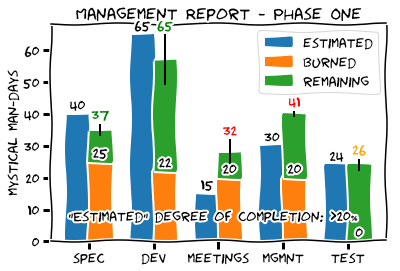

In [32]:
plt.xkcd()

labels = ['spec', 'dev', 'meetings', 'mgmnt', 'test']
estimated = [40, 65, 15, 30, 24]
burned = [25, 22, 20, 20, 0]
remaining = [10, 35, 8, 20, 24]
remainingStd = (2, 8, 4, 1, 2)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
estimationBar = ax.bar(x - width/2, estimated, width, label='estimated')
burnedBar = ax.bar(x + width/2, burned, width, label='burned')
remainingBar = ax.bar(x + width/2, remaining, width, bottom=burned, yerr=remainingStd, label='remaining')

ax.set_ylabel('mystical man-days')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(estimationBar)
autolabel(burnedBar)

def remainingLabel(estimations, remainings, burns, remainingsError):
    for estimation, remaining, burn, error in zip(estimations, remainings, burns, remainingsError):
        height = remaining.get_height() + burn.get_height() + error
        annotationColor = 'green'
        if height > estimation.get_height() + estimation.get_height()*1/20:
            annotationColor = 'orange'
        if height > estimation.get_height() + estimation.get_height()*1/10:
            annotationColor = 'red'
        ax.annotate('{}'.format(height),
                    xy=(remaining.get_x() + remaining.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color=annotationColor)

remainingLabel(estimationBar, remainingBar, burnedBar, remainingStd)

fig.text(
        0.5, 0.2,
        '"Estimated" degree of completion: >20%',
        ha='center')

plt.title('Management Report - Phase One')
plt.savefig('/home/jovyan/work/bars/management-report.svg')
